### **Consideration in Regression Analysis**

- **Coefficient (Coeff):**
    - Shows how much the dependeant variable changes for one unit change in independent variable.

- **Significance (p-value):**
    - if p < 0.05, then change is statistically significant.
    - if p >= 0.05, there is a chance it might be true/significant.

- **Model strength (R-Squared):**
    - Shows how well the data fits the model
    - 0.957 = 95.7% accurate

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "education-economy-data.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "omarmohammed70/how-education-drives-economic-growth",
  file_path
)

print("First 5 records:")
df.head()

/opt/homebrew/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


First 5 records:


,Country,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),GDP per Capita Category,Unemployment Rate (%),Continent
0,Afghanistan,43.0,0.28,1.723305e+10,2.710887,415.707417,Very Low,13.991,Asia
1,Albania,98.1,1.20,2.354718e+10,3.936625,8575.171134,Mid,10.108,Europe
2,Algeria,81.4,1.72,2.476260e+11,4.100000,5364.027950,Low,11.701,Africa
3,Andorra,100.0,3.33,3.785067e+09,2.583555,46812.448450,High,3.700,Europe
4,Angola,71.1,0.21,8.482465e+10,1.001289,2308.159767,Low,14.537,Africa


### **Multiple Regression with Segmentation**

In [2]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
file_path = "education-economy-data.csv"
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "omarmohammed70/how-education-drives-economic-growth",
    file_path
)

# Display columns to help select features
print("Columns in dataset:", df.columns.tolist())

# Select relevant features for multiple regression
# Example: Predict 'GDP Growth (% Annual)' using 'Literacy Rate', 'Unemployment Rate (%)'
features = ['Literacy Rate', 'Unemployment Rate (%)']
target = 'GDP Growth (% Annual)'

# Drop rows with missing values in selected columns
subset = df[features + [target]].dropna()

# Prepare feature matrix and target vector
X = subset[features]
y = subset[target]

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

Columns in dataset: ['Country', 'Literacy Rate', 'Physician Density', 'GDP (Current USD)', 'GDP Growth (% Annual)', 'GDP per Capita (Current USD)', 'GDP per Capita Category', 'Unemployment Rate (%)', 'Continent']
                              OLS Regression Results                             
Dep. Variable:     GDP Growth (% Annual)   R-squared:                       0.009
Model:                               OLS   Adj. R-squared:                 -0.002
Method:                    Least Squares   F-statistic:                    0.8150
Date:                   Wed, 15 Oct 2025   Prob (F-statistic):              0.444
Time:                           23:21:12   Log-Likelihood:                -551.05
No. Observations:                    191   AIC:                             1108.
Df Residuals:                        188   BIC:                             1118.
Df Model:                              2                                         
Covariance Type:               nonrobust         

### **Problem Statement: Practice Regression**
##### Predict global sales and identify key performance drivers for video games.

- Global video game sales depend on several factors such as regional sales distribution, genre popularity, and platform reach. Using the *vgsales.csv* dataset, develop a multiple regression model to predict **Global_Sales** based on regional sales and categorical variables (Example: Genre, Platform, Year).
 
- The analysis aims to determine which variables most strongly influence global performance, and to quantify how much regional markets contribute to total global success.

**Datasets:**
- [Video-Game-Sales Dataset (Kaggle)](https://www.kaggle.com/datasets/gregorut/videogamesales)

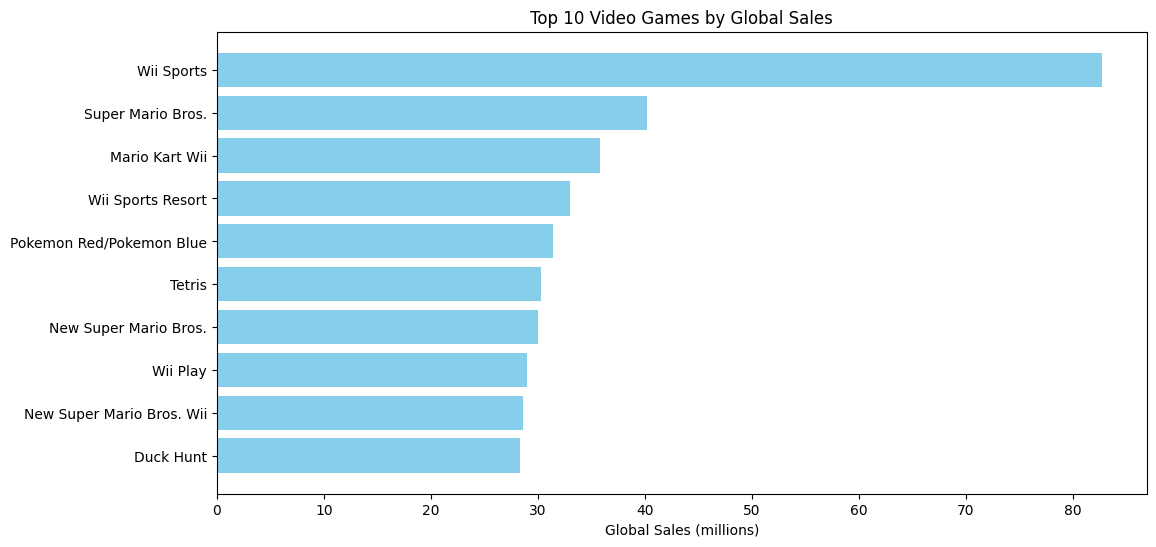

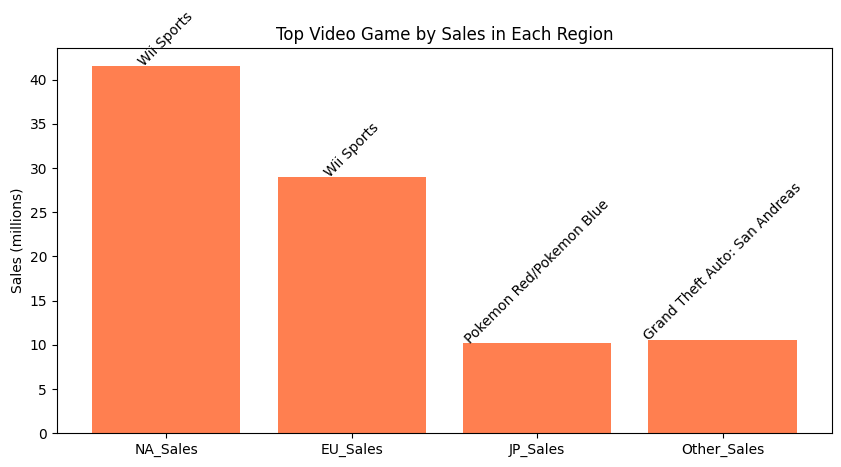

In [3]:
# Import necessary libraries, load dataset and plot graphs
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "vgsales.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "gregorut/videogamesales",
  file_path
)

# Use first 4000 rows for plots
df_sample = df.head(16000)

# Plot 1: Top 10 Global Sales
top_global_sales = df_sample.nlargest(10, 'Global_Sales')
plt.figure(figsize=(12, 6))
plt.barh(top_global_sales['Name'], top_global_sales['Global_Sales'], color='skyblue')
plt.xlabel('Global Sales (millions)')
plt.title('Top 10 Video Games by Global Sales')
plt.gca().invert_yaxis()
plt.show()

# Plot 2: Top Video Game by Region
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
top_per_region = {}
for region in regions:
    idx = df_sample[region].idxmax()
    top_game = df_sample.loc[idx]
    top_per_region[region] = (top_game['Name'], top_game[region])

top_region_df = pd.DataFrame(top_per_region).T.rename(columns={0: 'Game', 1: 'Sales'})
plt.figure(figsize=(10, 5))
plt.bar(top_region_df.index, top_region_df['Sales'], color='coral')
for i, (game, sales) in enumerate(zip(top_region_df['Game'], top_region_df['Sales'])):
    plt.text(i, sales + 0.01, game, ha='center', rotation=45)
plt.ylabel('Sales (millions)')
plt.title('Top Video Game by Sales in Each Region')
plt.show()

In [5]:
# Developing a multiple regression model to predict **Global_Sales** based on regional sales and categorical variables
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the video game sales dataset
file_path = "vgsales.csv"

# Load the latest version
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "gregorut/videogamesales",
    file_path
)

# Drop rows with missing values for relevant columns
subset = df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre', 'Platform', 'Year']].dropna().reset_index(drop=True)

# One-hot encode categorical variables (Genre, Platform)
categorical_cols = ['Genre', 'Platform']
subset_encoded = pd.get_dummies(subset, columns=categorical_cols, drop_first=True)

# Ensure all columns are numeric (Year may be float/object)
for col in subset_encoded.columns:
    subset_encoded[col] = pd.to_numeric(subset_encoded[col], errors='coerce')

# Prepare predictors (regional sales, year, dummies) and target
X = subset_encoded.drop('Global_Sales', axis=1)
y = subset_encoded['Global_Sales']

# Drop any rows with missing values in X or y
valid_rows = X.notnull().all(axis=1) & y.notnull()
X = X.loc[valid_rows]
y = y.loc[valid_rows]

# Convert to numpy float64 arrays to avoid dtype=object issues
X = X.astype(np.float64)
y = y.astype(np.float64)
X = sm.add_constant(X)

# Fit OLS multiple regression
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.198e+07
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:22:12   Log-Likelihood:                 62671.
No. Observations:               16327   AIC:                        -1.252e+05
Df Residuals:                   16280   BIC:                        -1.249e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0333      0